In [1]:
!date

jue ene  9 14:11:30 CET 2020


In [2]:
# Active system's automagic
%automagic on


Automagic is ON, % prefix IS NOT needed for line magics.


In [3]:
# Load work environment

In [4]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/02_Development'

In [5]:
#folder = '/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/03_Presentation'
folder = os.getcwd()
!ls {folder}

01_loading_and_preprocessing_original_data_complete.ipynb
01_Loading_and_preprocessing_original_data.ipynb
02_Draw_transformed_data.ipynb
03_Data_preparation_and_pipelines_of_naive_models.ipynb
04_Data_model_improvement_hyperparameters.ipynb
Untitled.ipynb


In [6]:
os.chdir(folder)
os.getcwd()

'/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/02_Development'

In [7]:
# Load library for work and analitics data
import pandas as pd
import numpy as np

In [8]:
!ls -ltr ../03_Presentation/02_OUT_csv_original_data_transformed.csv

-rw-rw-r-- 1 dsc dsc 27565813 ene  7 11:12 ../03_Presentation/02_OUT_csv_original_data_transformed.csv


In [9]:
# Read from excel files complete with column names stipulated and transform them
# (1) Imports:
import os
import glob

In [10]:
# (2) File list:
path = os.chdir(os.getcwd() + '/..' + '/03_Presentation')
!pwd

/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/03_Presentation


In [11]:
%%time
# (3) Upload cvsv file:
df_from_xlsx_total = pd.read_csv("02_OUT_csv_original_data_transformed.csv")

CPU times: user 607 ms, sys: 50.7 ms, total: 658 ms
Wall time: 672 ms


In [12]:
len(df_from_xlsx_total)

306183

In [13]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [14]:
# Data mapping

In [15]:
df_ratings_lab_ohe_sample = df_from_xlsx_total.sample(n=10000).reset_index(drop=True).copy()

In [16]:
df_ratings_lab_ohe_sample["ESTADO"] = df_ratings_lab_ohe_sample["ESTADO"].astype(np.str)
df_ratings_lab_ohe_sample["CONDADO"] = df_ratings_lab_ohe_sample["CONDADO"].astype(np.str)
df_ratings_lab_ohe_sample["ORGANIZACION"] = df_ratings_lab_ohe_sample["ORGANIZACION"].astype(np.str)
df_ratings_lab_ohe_sample["TIPO_PLAN_GENERICO_MEDICARE"] = df_ratings_lab_ohe_sample["TIPO_PLAN_GENERICO_MEDICARE"].astype(np.str)
df_ratings_lab_ohe_sample["PRIMA_MENSUAL_CONSOLIDADA"] = df_ratings_lab_ohe_sample["PRIMA_MENSUAL_CONSOLIDADA"].astype(np.float64)
df_ratings_lab_ohe_sample["MEDICAMS_ANUALES_DEDUCIBLES"] = df_ratings_lab_ohe_sample["MEDICAMS_ANUALES_DEDUCIBLES"].astype(np.float64)
df_ratings_lab_ohe_sample["TIPO_BENEFICIO"] = df_ratings_lab_ohe_sample["TIPO_BENEFICIO"].astype(np.str)
df_ratings_lab_ohe_sample["COBERTURA_ADICIONAL_OFRECIDA"] = df_ratings_lab_ohe_sample["COBERTURA_ADICIONAL_OFRECIDA"].astype(np.str)
df_ratings_lab_ohe_sample["DETALLE_BENEFICIO"] = df_ratings_lab_ohe_sample["DETALLE_BENEFICIO"].astype(np.str)
df_ratings_lab_ohe_sample["DESEMBOLSO_MAXIMO"] = df_ratings_lab_ohe_sample["DESEMBOLSO_MAXIMO"].astype(np.float64)
df_ratings_lab_ohe_sample["CLASIFICACION"] = df_ratings_lab_ohe_sample["CLASIFICACION"].astype(np.str)

In [17]:
# Labeling through Label Encoding
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder() 

In [18]:
df_ratings_lab_ohe_sample['ESTADO']= lab.fit_transform(df_ratings_lab_ohe_sample['ESTADO'])
df_ratings_lab_ohe_sample['CONDADO']= lab.fit_transform(df_ratings_lab_ohe_sample['CONDADO'])
df_ratings_lab_ohe_sample['ORGANIZACION']= lab.fit_transform(df_ratings_lab_ohe_sample['ORGANIZACION'])
#df_ratings_lab_ohe_sample['PLAN']= lab.fit_transform(df_ratings_lab_ohe_sample['PLAN'])
df_ratings_lab_ohe_sample['TIPO_PLAN_GENERICO_MEDICARE']= lab.fit_transform(df_ratings_lab_ohe_sample['TIPO_PLAN_GENERICO_MEDICARE'])
df_ratings_lab_ohe_sample['PRIMA_MENSUAL_CONSOLIDADA']= lab.fit_transform(df_ratings_lab_ohe_sample['PRIMA_MENSUAL_CONSOLIDADA'])
df_ratings_lab_ohe_sample['MEDICAMS_ANUALES_DEDUCIBLES']= lab.fit_transform(df_ratings_lab_ohe_sample['MEDICAMS_ANUALES_DEDUCIBLES'])
df_ratings_lab_ohe_sample['TIPO_BENEFICIO']= lab.fit_transform(df_ratings_lab_ohe_sample['TIPO_BENEFICIO'])
df_ratings_lab_ohe_sample['COBERTURA_ADICIONAL_OFRECIDA']= lab.fit_transform(df_ratings_lab_ohe_sample['COBERTURA_ADICIONAL_OFRECIDA'])
df_ratings_lab_ohe_sample['DETALLE_BENEFICIO']= lab.fit_transform(df_ratings_lab_ohe_sample['DETALLE_BENEFICIO'])
#df_ratings_lab_ohe_sample['CONTRATO_ID']= lab.fit_transform(df_ratings_lab_ohe_sample['CONTRATO_ID'])
#df_ratings_lab_ohe_sample['PLAN_ID']= lab.fit_transform(df_ratings_lab_ohe_sample['PLAN_ID'])
#df_ratings_lab_ohe_sample['SEGMENTO_ID']= lab.fit_transform(df_ratings_lab_ohe_sample['SEGMENTO_ID'])
df_ratings_lab_ohe_sample['DESEMBOLSO_MAXIMO']= lab.fit_transform(df_ratings_lab_ohe_sample['DESEMBOLSO_MAXIMO'])
#df_ratings_lab_ohe_sample['CLASIFICACION']= lab.fit_transform(df_ratings_lab_ohe_sample['CLASIFICACION'])

In [19]:
# Load variables with sample data.
X = np.array(df_ratings_lab_ohe_sample.drop('CLASIFICACION', 1))
y = np.array(df_ratings_lab_ohe_sample["CLASIFICACION"])
X.shape

(10000, 10)

In [20]:
y.shape

(10000,)

In [21]:
y

array(['4.5', '3.5', 'NO_ASIGNADO', ..., '4', '3', '4.5'], dtype=object)

In [22]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

In [23]:
# Binarize the output
y = label_binarize(y, classes=['2', '2.5', '3', '3.5', '4', '4.5', '5', 'NO_ASIGNADO'])
n_classes = y.shape[1]

In [24]:
y

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [25]:
y.dtype

dtype('int64')

In [26]:
# Train-test split and load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [29]:
# Create the encoder (by OneHotEncoder)
encoder = OneHotEncoder(handle_unknown='ignore')
# Assume for simplicity all features are categorical.
encoder.fit(X_train)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [30]:
# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [31]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=0))

In [32]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [33]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [34]:
def cycle(iterable):
    # cycle('ABCD') --> A B C D A B C D A B C D ...
    saved = []
    for element in iterable:
        yield element
        saved.append(element)
    while saved:
        for element in saved:
              yield element

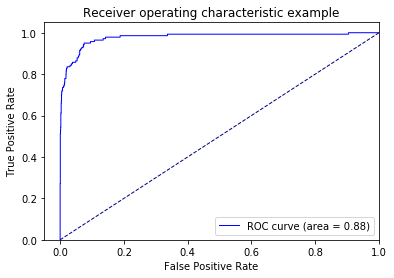

In [35]:
#Plot of a ROC curve for a specific class
colors = 'blue' #, 'red', 'green', 'yellow', 'brown', 'pink', 'purple', 'orange'])
plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color=colors,
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [38]:
# Area under ROC for the multiclass problem
y_prob = classifier.predict_proba(X_test)

In [39]:
from sklearn.metrics import roc_auc_score 
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

TypeError: roc_auc_score() got an unexpected keyword argument 'multi_class'

In [37]:
?roc_auc_score

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [42]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# (Agrega las contribuciones de todas las clases para calcular el promedio)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

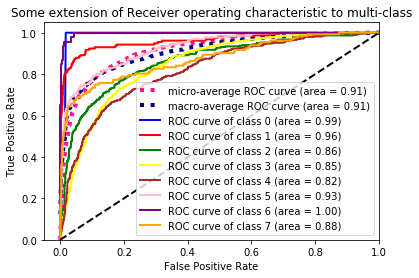

In [49]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

# Un macro-promedio calcula la métrica independiente para cada clase y luego toma el promedio.
# Por tanto, tratará a todas las clases por igual.
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['blue', 'red', 'green', 'yellow', 'brown', 'pink', 'purple', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

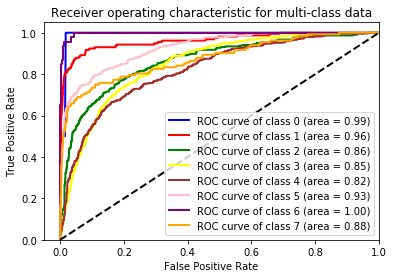

In [44]:
# Plot ROC curves for the multilabel problem
colors = cycle(['blue', 'red', 'green', 'yellow', 'brown', 'pink', 'purple', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [97]:
####################